# IPR architecture cystein genes

### Workflow:

1. Create the schemaic table
2. Create the domain architecture figure

## 1. Create the schematic table

### 1.1 Create the scematic table

In [5]:
!python ../scripts/schematic_arc_table.py --interpro_path '../data/interproscan/wb_cr_interpro.csv' --out_file_path '../results/schematic_table_wb_cr.tsv' --analysis 'Pfam' 

### 1.2 Display schematic table

In [7]:
d = pd.read_csv('../results/schematic_table_wb_cr.tsv', sep='\t', header=None)
d

0     1        2    3    4   5  \
0   Architecture 14  2400  PF09132   25  125   1   
1   Architecture 14  2400  PF09132  150  250   1   
2   Architecture 14  2400  PF09132  275  375   1   
3   Architecture 14  2400  PF09132  400  500   1   
4   Architecture 14  2400  PF09132  525  625   1   
..              ...   ...      ...  ...  ...  ..   
78   Architecture 5   300  PF03302  150  250   3   
79   Architecture 4   150  PF03302   25  125  54   
80   Architecture 3   150  PF01437   25  125   1   
81   Architecture 2   150  PF07974   25  125   3   
82   Architecture 1   150  PF00008   25  125   1   

                                                    6  \
0                                       GL50803_89315   
1                                       GL50803_89315   
2                                       GL50803_89315   
3                                       GL50803_89315   
4                                       GL50803_89315   
..                                                ...   
78         GL50803_117472;GL50803_117473;GL50803_4313   
79  GL50803_102178;GL50803_111732;GL50803_112113;G...   
80                                     GL50803_113723   
81            GL50803_25238;GL50803_6372;GL50803_6509   
82                                      GL50803_94003   

                                           7  
0                                       BmKX  
1                                       BmKX  
2                                       BmKX  
3                                       BmKX  
4                                       BmKX  
..                                       ...  
78  Giardia variant-specific surface protein  
79  Giardia variant-specific surface protein  
80                             Plexin repeat  
81                           EGF-like domain  
82                           EGF-like domain  

[83 rows x 8 columns]

## 2 Create domain architecture figure

### 2.1 - preprocessing: Create [protein_id, species] file

In [25]:
interproscan_header = ['protein_id','Seq MD5 digest','Sequence length','Analysis', 'Signature accession', 
                           'Signature description','Start location', 'Stop location', 'Score', 'Status', 
                           'Date of run', 'Interpro annotations - accession', 'Interpro annotation - description', 
                           'optional: GO terms', 'optional: Pathway annotation']

df_species_group = pd.read_csv('../data/interproscan/wb_cr_interpro.csv', sep='\t', header=None, names = interproscan_header)
df_species_group = df_species_group.iloc[1:]
df_species_group_pids = df_species_group[['protein_id']].drop_duplicates()
df_species_group_pids['specie'] = 'species?'

df_species_group_pids.to_csv('../results/wb_cr_pids_species.tsv', sep='\t', index=False)
df_species_group_pids

protein_id    specie
1       GL50803_60030  species?
41    GL50803_d113304  species?
58     GL50803_d15250  species?
84     GL50803_113836  species?
124     GL50803_15250  species?
...               ...       ...
5271   GL50803_113163  species?
5290    GL50803_87628  species?
5312     GL50803_7748  species?
5314    GL50803_38901  species?
5346    GL50803_50443  species?

[246 rows x 2 columns]

### 2.2 Create domain architecture figure 

In [30]:
!python ../scripts/domain_arc_figure.py --out_file '../results/schematic_figure_wb_cr.png' --interproscan '../results/schematic_table_wb_cr.tsv' --analysis 'Pfam' --general_domains 'Yes' --groups_protein_ids '../results/wb_cr_pids_species.tsv'

### 2.3 Display domain architecture figure

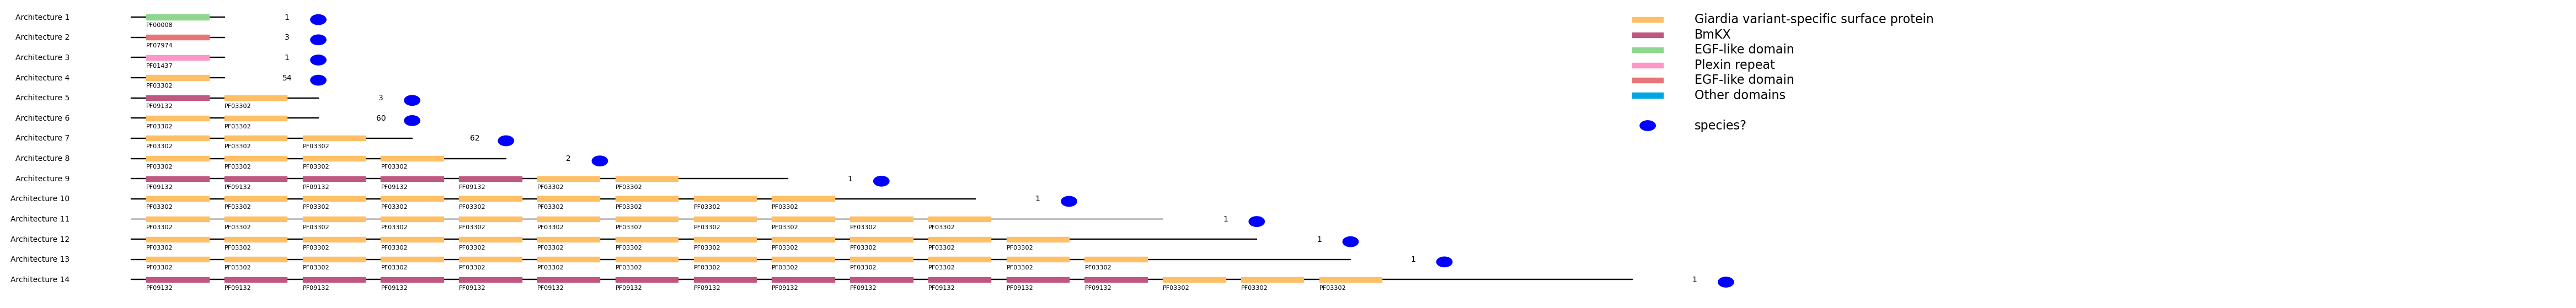

In [31]:
from IPython.display import Image
Image(filename=('../results/schematic_figure_wb_cr.png'))